<a href="https://colab.research.google.com/github/Rus320/Heart-disease-classification/blob/main/NN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dataset**

In [ ]:
pip install ucimlrepo

In [ ]:
# Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert.
# (1988). Heart Disease. UCI Machine Learning Repository.
# https://doi.org/10.24432/C52P4X.

# Source: https://archive.ics.uci.edu/dataset/45/heart+disease
from ucimlrepo import fetch_ucirepo, list_available_datasets

# import dataset
heart_disease = fetch_ucirepo(id=45)

# access data
x = heart_disease.data.features
y = heart_disease.data.targets

# access metadata
print(heart_disease.metadata.num_instances)

# access variable info in tabular format
print(heart_disease.variables)

303
        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2          

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = fetch_ucirepo(id=45) ['data']['original']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
# Shape of the dataframe
df.shape

(303, 14)

In [ ]:
# Print information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
# Describe the statistic of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# Check for null values in the dataframe
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [ ]:
# Imputation
df=df.fillna(method= 'pad')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardizing data using standard scaler
df_scaled = df.copy()
# df_scaled[df_scaled.columns[0:12]] = StandardScaler().fit_transform(
#     df_scaled[df_scaled.columns[0:12]]
#     )
# for col in df_scaled.columns:
#     if col == 'sex':
#         pass
#     elif col == 'num':
#         pass
#     else:
#         df_scaled[col] = StandardScaler().fit_transform(df_scaled[col])
col = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df_scaled[df_scaled.columns[col]] = StandardScaler().fit_transform(
    df_scaled[df_scaled.columns[col]]
    )

df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,1,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.724272,0.655282,0
1,1.392002,1,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.456228,-0.895894,2
2,1.392002,1,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.396061,1.172341,1
3,-1.932564,1,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.724272,-0.895894,0
4,-1.489288,0,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.724272,-0.895894,0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal')])

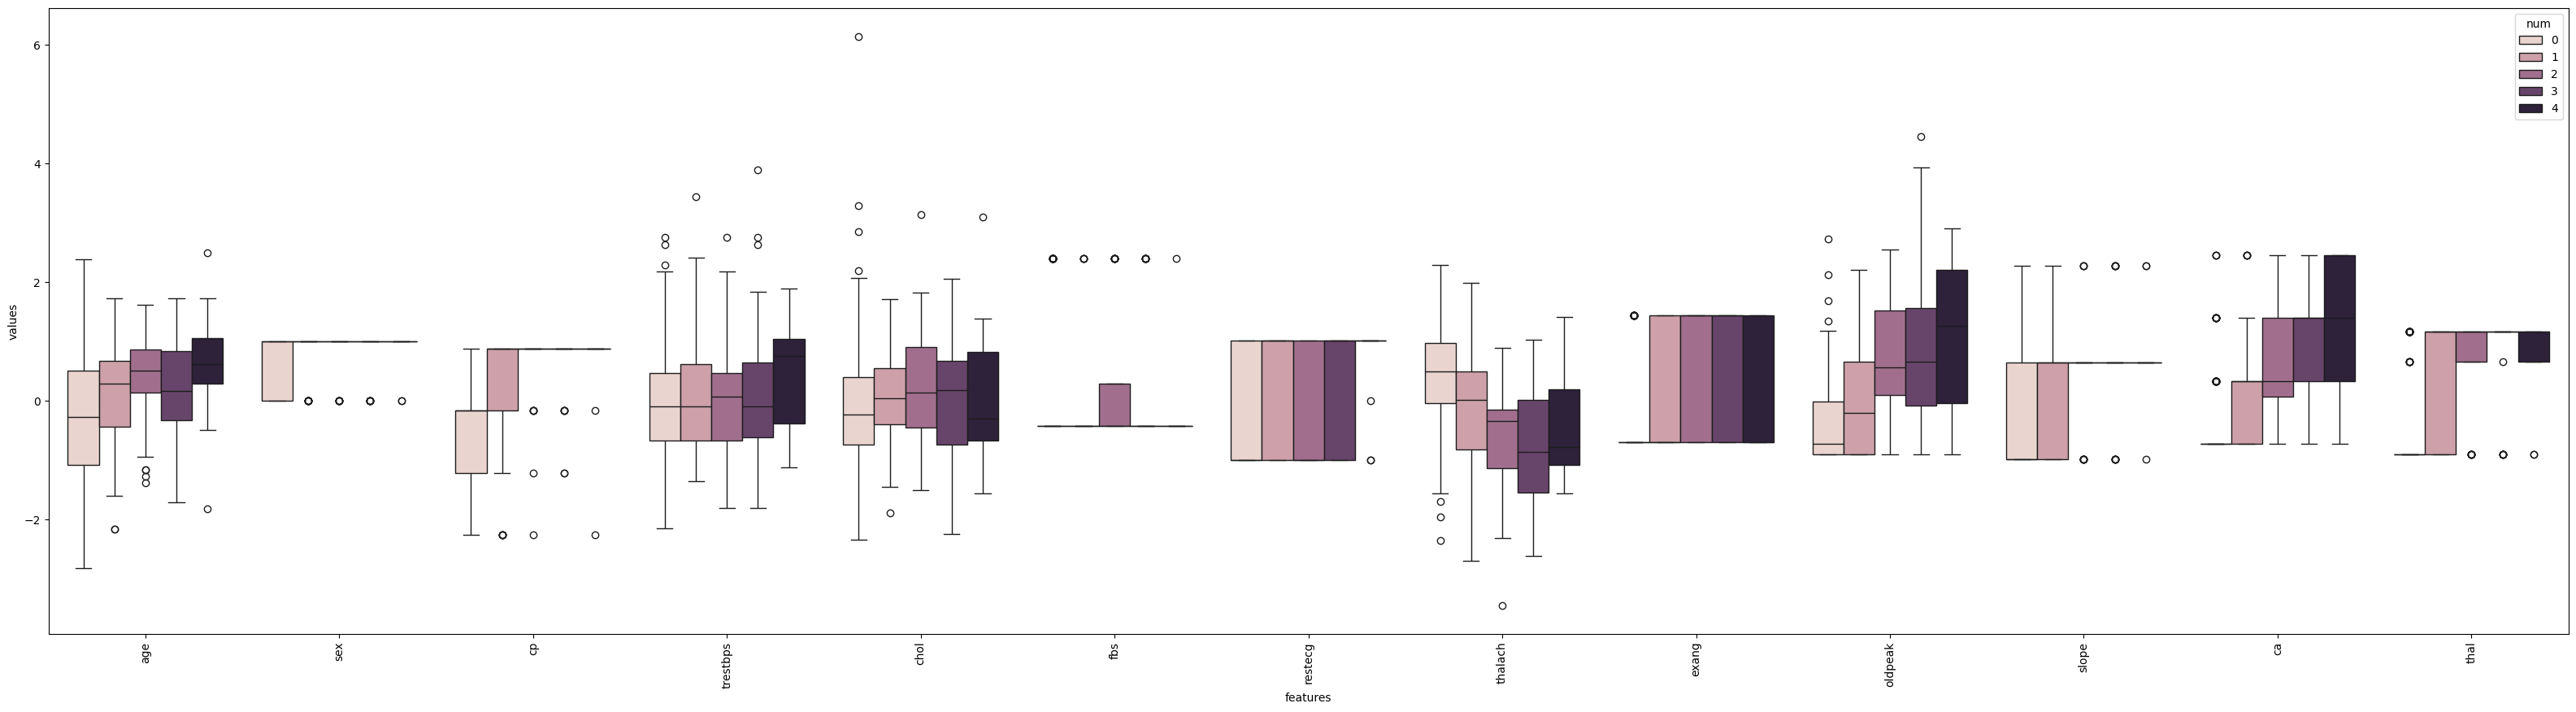

In [ ]:
# Boxplot for data visualisation
# Melt the dataframe
df_meld = pd.melt(df_scaled,
                  id_vars='num',
                  var_name='features',
                  value_name='values')
# Boxplots
plt.figure(figsize=(40,10))
sns.boxplot(x='features', y='values', hue='num', data=df_meld)
plt.xticks(rotation=90)

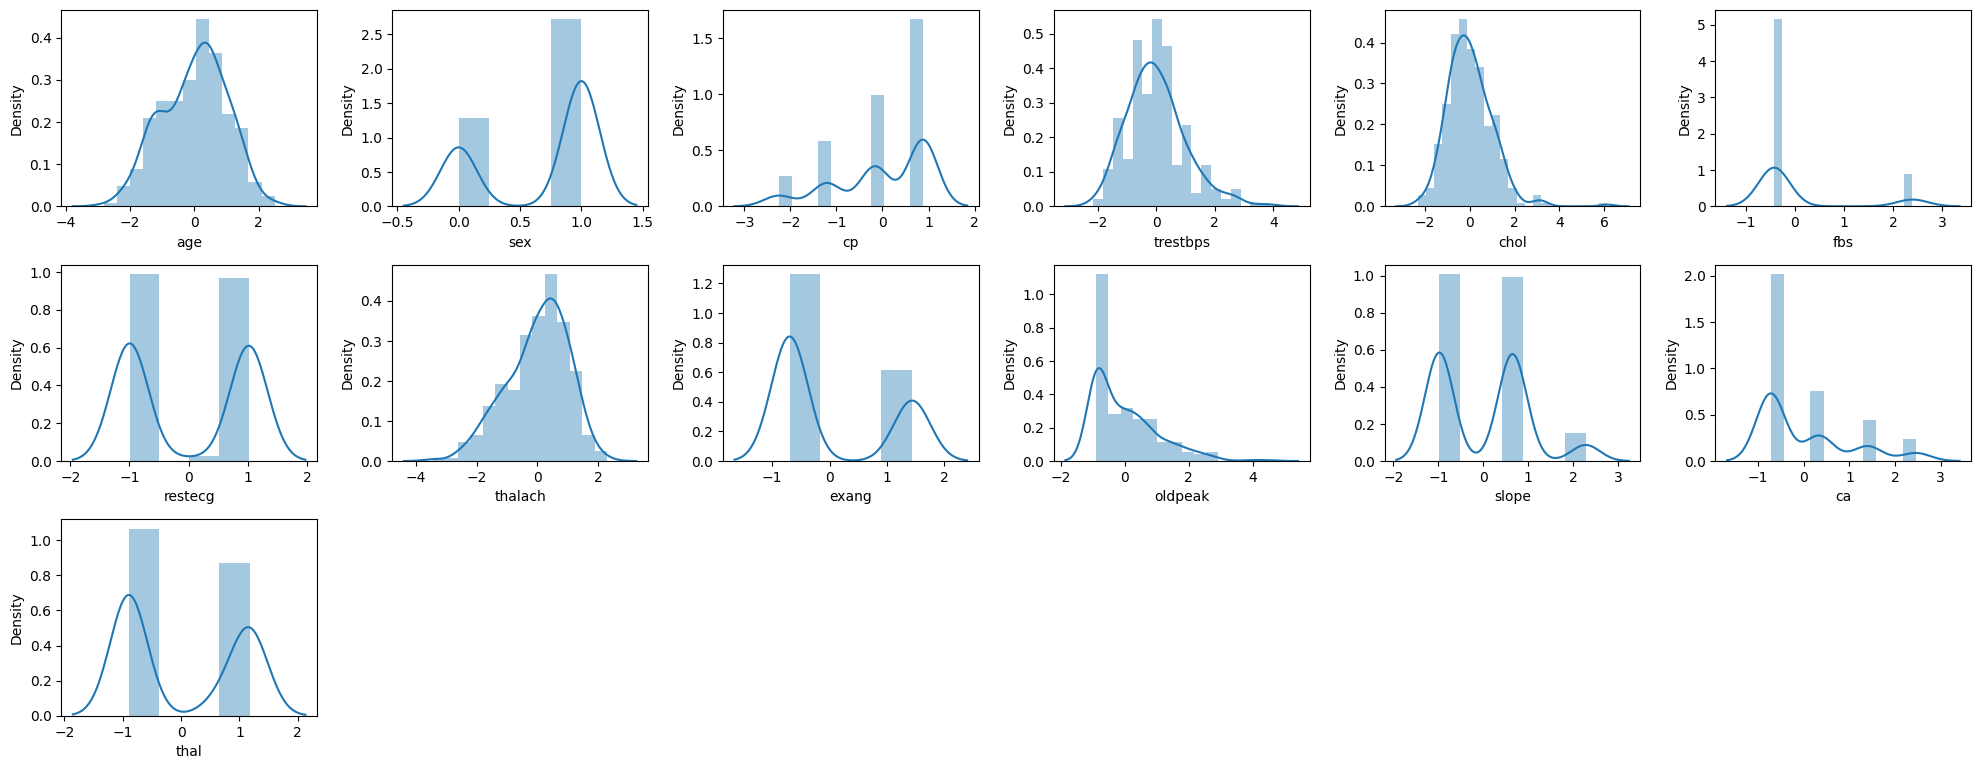

In [ ]:
# Plot the distribution of the standardized features
plt.figure(figsize = (20,15))
plotnumber = 1

X_scaled = df_scaled.drop('num', axis=1)
Y = df['num']

for column in X_scaled:
  if plotnumber <= 40:
    ax = plt.subplot(6,6, plotnumber)
    sns.distplot(X_scaled[column])
    plt.xlabel(column)

  plotnumber +=1
plt.tight_layout()
plt.show()

<Axes: >

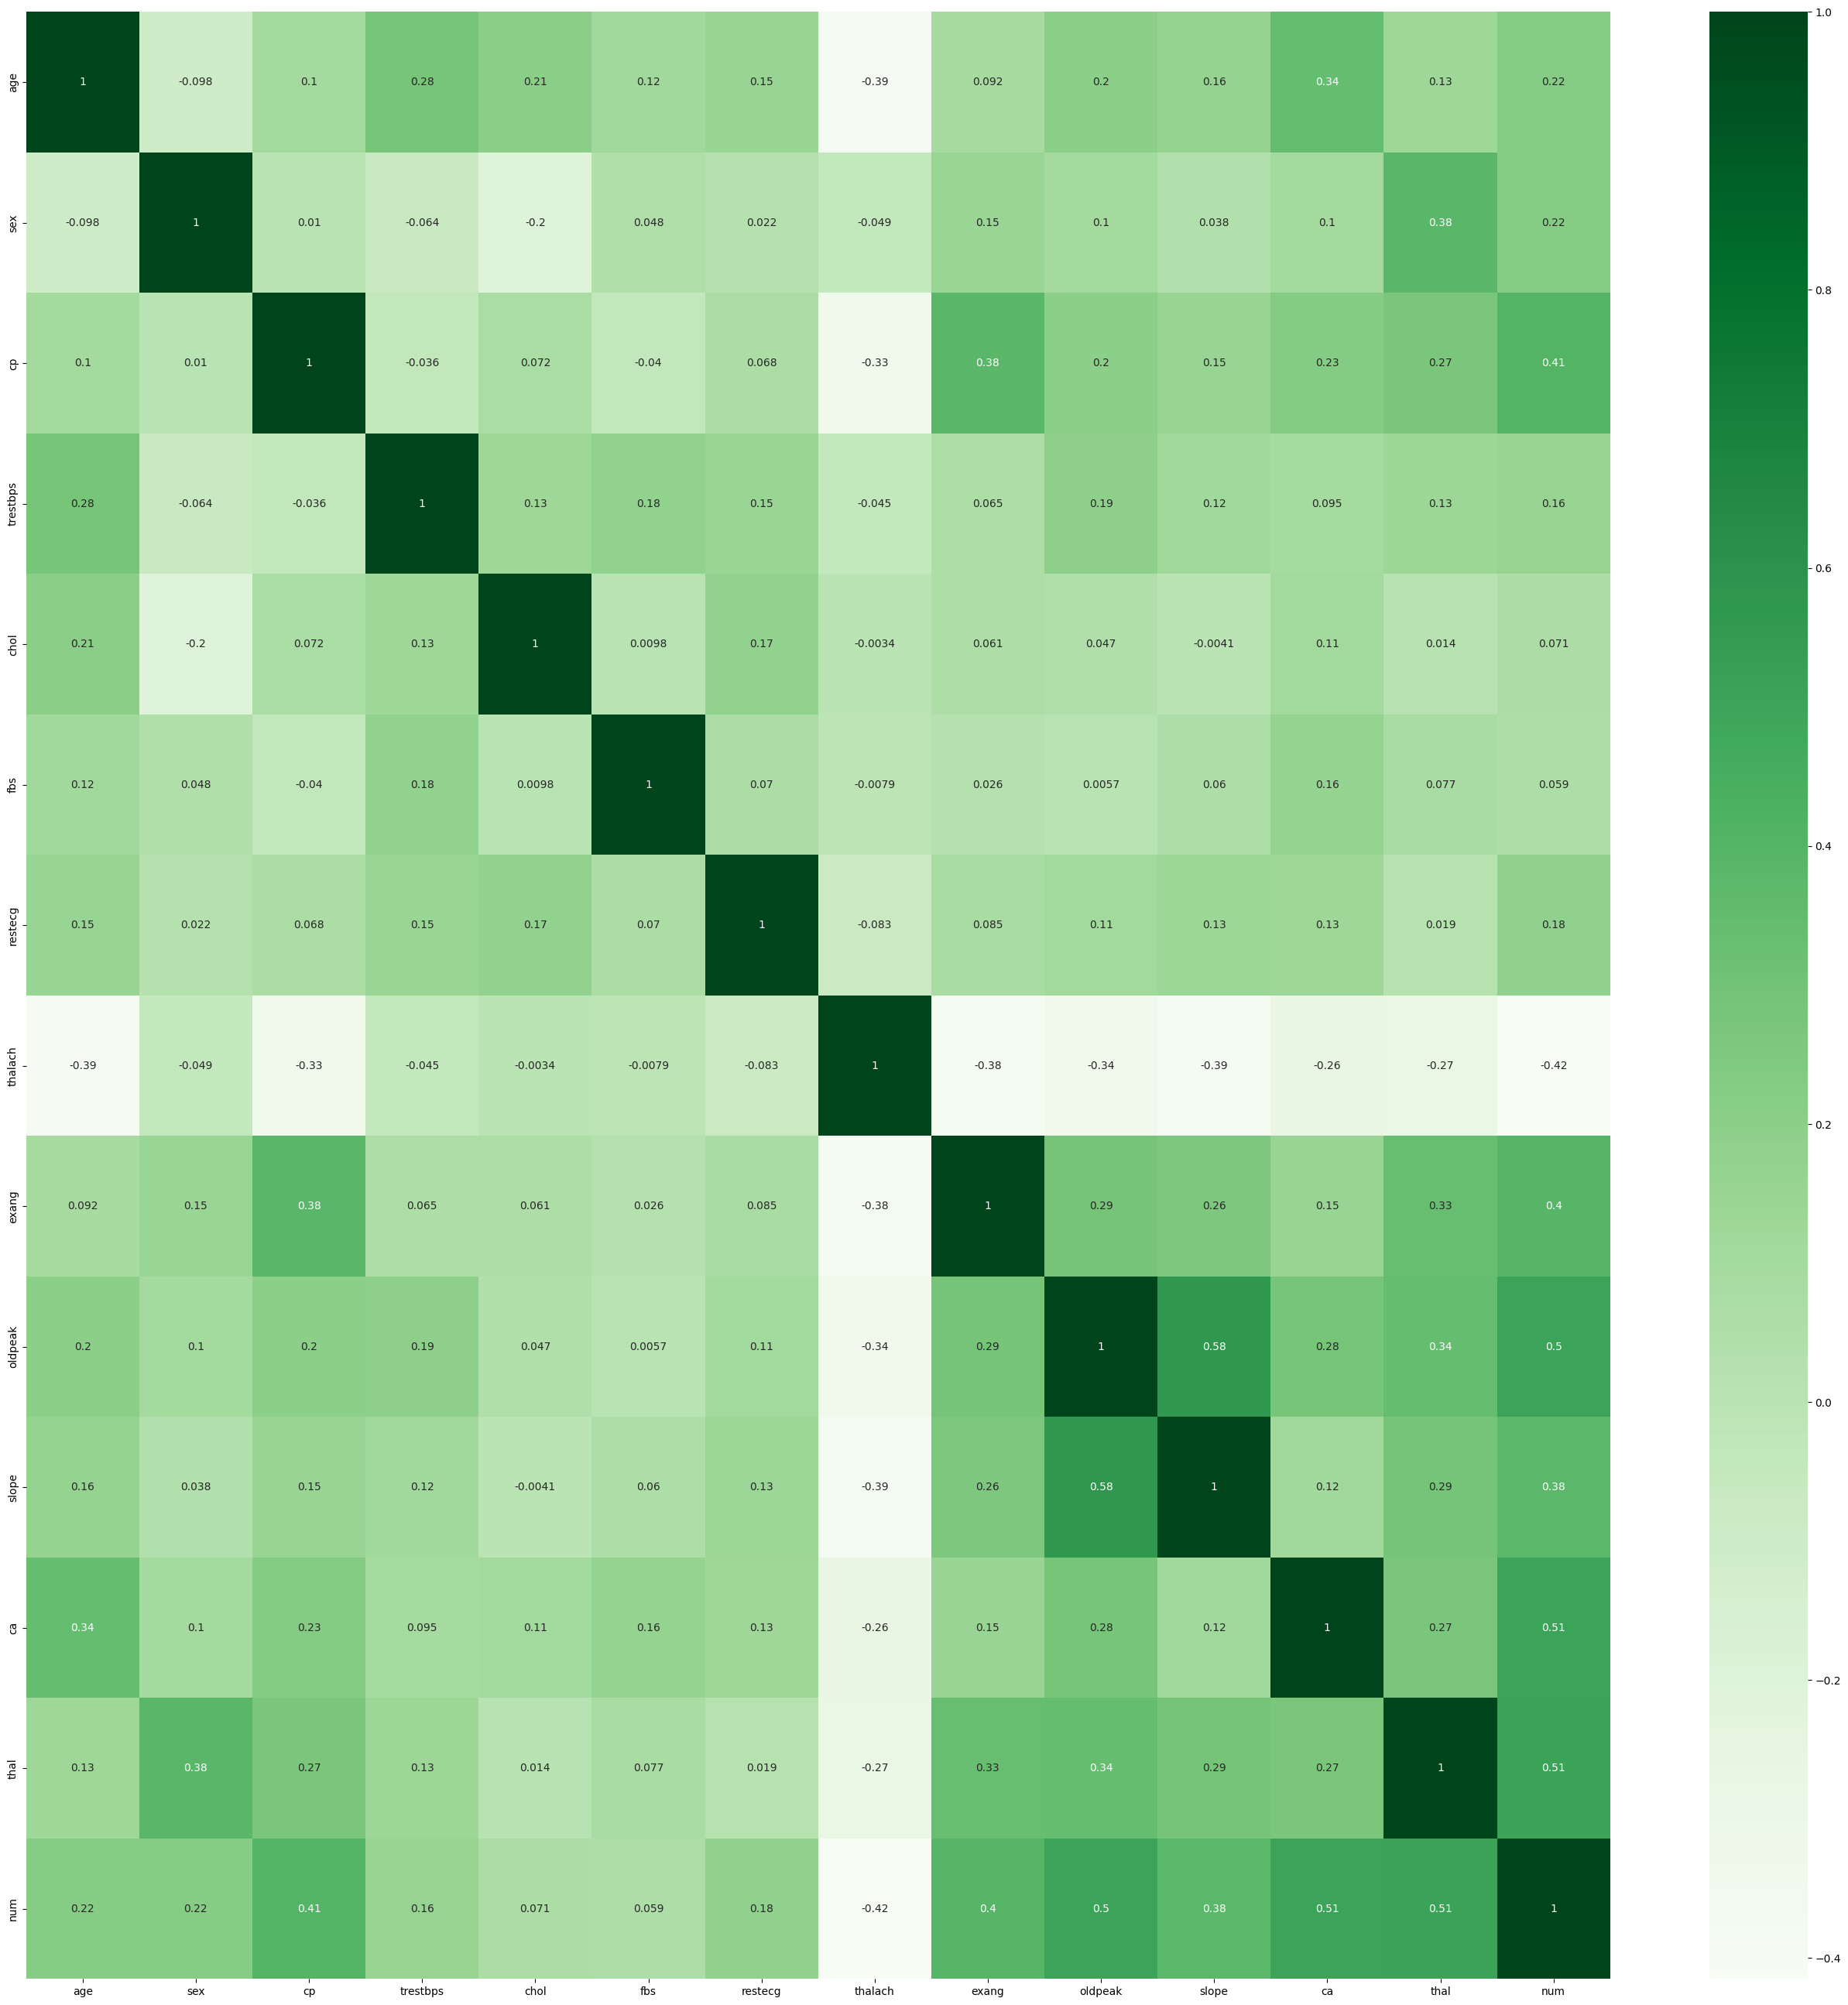

In [ ]:
# Plot the correlation of the faetures
plt.figure(figsize = (33,33))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')

<Axes: ylabel='count'>

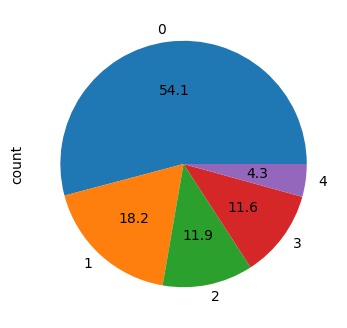

In [ ]:
# Plot the pie chart to display the distribution of the label
df.num.value_counts().plot(kind = 'pie', figsize = (4,4), labels = ['0', '1', '2', '3', '4'], autopct = "%.1f")

# **Preparing the data, constructing and training NN model**

In [ ]:
import torch
from torch import nn

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.dropout1 = nn.Dropout(0.2)
    self.linear1 = nn.Linear(13, 13*13)
    self.act1 = nn.ReLU()
    self.dropout2 = nn.Dropout(0.2)
    self.linear2 = nn.Linear(13*13, 13*13)
    self.act2 = nn.ReLU()
    self.dropout3 = nn.Dropout(0.2)
    self.linear3 = nn.Linear(13*13, 5)
    # self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    # x = self.dropout1(x)
    x = self.act1(self.linear1(x))
    x = self.dropout2(x)
    x = self.act2(self.linear2(x))
    x = self.dropout3(x)
    output = self.linear3(x)
    return output


In [ ]:
data = df_scaled.drop('num', axis=1)
data.shape

(303, 13)

In [ ]:
label = df_scaled.loc[:, 'num']
label.shape

(303,)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

def create_datasets(data, label, train_size, valid_pct=0.20, seed=None):
  data = data.to_numpy()
  label = label.to_numpy()
  data_train, data_test, label_train, label_test = train_test_split(data, label,
                                                                    test_size=valid_pct,
                                                                    random_state=seed,
                                                                    shuffle=True)
  test_size = len(label_test)
  train_dataset = TensorDataset(
      torch.tensor(data_train).float(),
      torch.tensor(label_train).long()
  )
  val_dataset = TensorDataset(
      torch.tensor(data_train).float(),
      torch.tensor(label_train).long()
  )
  test_dataset = TensorDataset(
      torch.tensor(data_test).float(),
      torch.tensor(label_test).long()
  )

  return train_dataset, val_dataset, test_dataset, test_size

def create_loaders(data, batch_size=20, jobs=0):
  """Wraps the datasets returned by create_datasets function
  with data loaders."""

  train_dataset, val_dataset, test_datasets, test_size = data

  train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=jobs)
  val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=jobs)
  test_dataloader = DataLoader(test_datasets, batch_size=batch_size, shuffle=False, num_workers=jobs)

  return  train_dataloader, val_dataloader, test_dataloader, test_size


In [ ]:
from torch import optim
from torch.nn import functional as F

train_size = data.shape[0]
datasets = create_datasets(data, label, train_size)
train_dataloader, val_dataloader, test_dataloader, test_size = create_loaders(datasets, batch_size=20)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
learning_rate = 0.001
num_epochs = 50
interations_per_epoch = len(train_dataloader)
best_acc = 0
patience, trials = 500, 0
base = 1
step = 2
loss_history = []
acc_history = []

model = Model().to(device)
print('Model:')
print(model)

criterion = nn.CrossEntropyLoss(reduction='sum')
optimizer_Adam = optim.Adam(model.parameters(), lr=learning_rate)

total_params = sum(
    param.numel() for param in model.parameters()
)

print('Total parameters: ', total_params)

print('Start model training')

for epoch in range(1, num_epochs + 1):

  model.train()
  epoch_loss = 0

  for i, batch in enumerate(train_dataloader):
    x, y_batch = [t.to(device) for t in batch]
    optimizer_Adam.zero_grad()
    output = model(x)
    loss = criterion(output, y_batch)
    epoch_loss += loss.item()
    loss.backward()
    optimizer_Adam.step()

  epoch_loss /= train_size
  loss_history.append(epoch_loss)

  model.eval()
  correct, total = 0, 0

  for batch in val_dataloader:
    x, y_batch = [t.to(device) for t in batch]
    out = model(x)
    preds = F.log_softmax(out, dim=1).argmax(dim=1)
    total += y_batch.size(0)
    correct += (preds == y_batch).sum().item()

  acc = correct / total
  acc_history.append(acc)

  if epoch % base == 0:
    print(f'Epoch: {epoch:3d}. Loss: {epoch_loss:.4f}. Acc.: {acc:2.2%}')


Model:
Model(
  (dropout1): Dropout(p=0.2, inplace=False)
  (linear1): Linear(in_features=13, out_features=169, bias=True)
  (act1): ReLU()
  (dropout2): Dropout(p=0.2, inplace=False)
  (linear2): Linear(in_features=169, out_features=169, bias=True)
  (act2): ReLU()
  (dropout3): Dropout(p=0.2, inplace=False)
  (linear3): Linear(in_features=169, out_features=5, bias=True)
)
Total parameters:  31946
Start model training
Epoch:   1. Loss: 1.1303. Acc.: 52.89%
Epoch:   2. Loss: 0.8845. Acc.: 58.68%
Epoch:   3. Loss: 0.7968. Acc.: 64.88%
Epoch:   4. Loss: 0.7372. Acc.: 67.36%
Epoch:   5. Loss: 0.7185. Acc.: 69.42%
Epoch:   6. Loss: 0.6991. Acc.: 69.42%
Epoch:   7. Loss: 0.6760. Acc.: 70.25%
Epoch:   8. Loss: 0.6496. Acc.: 71.49%
Epoch:   9. Loss: 0.6369. Acc.: 72.73%
Epoch:  10. Loss: 0.6247. Acc.: 73.55%
Epoch:  11. Loss: 0.5788. Acc.: 73.97%
Epoch:  12. Loss: 0.5775. Acc.: 73.55%
Epoch:  13. Loss: 0.5715. Acc.: 73.55%
Epoch:  14. Loss: 0.5765. Acc.: 74.38%
Epoch:  15. Loss: 0.5344. Acc.:

Text(0, 0.5, 'Loss')

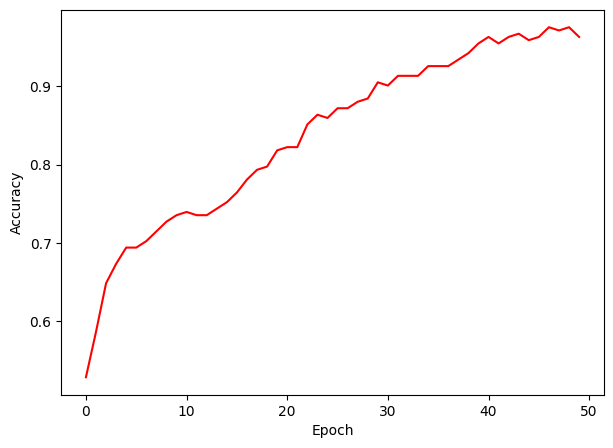

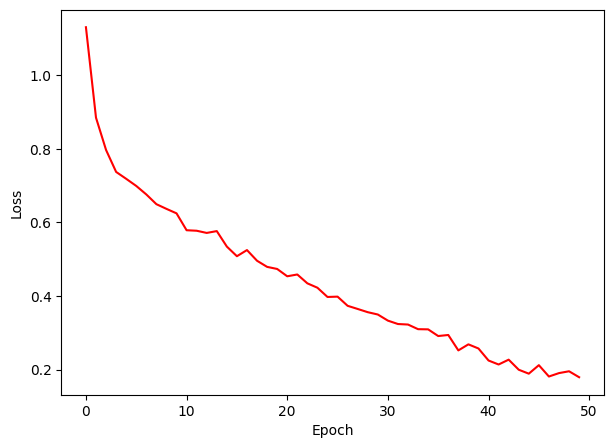

In [ ]:
# Plotting the loss & acc curves
plt.figure(figsize=(7, 5))

plt.plot(range(num_epochs), acc_history, color='r', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.figure(2, figsize=(7, 5))

plt.plot(range(num_epochs), loss_history, color='r', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
model.eval()
correct, total = 0, 0
for batch in test_dataloader:
  x, y_batch = [t.to(device) for t in batch]
  out = model(x)

  preds = F.log_softmax(out, dim=1).argmax(dim=1)

  print(y_batch.shape)
  total += y_batch.size(0)
  correct += (preds == y_batch).sum().item()

acc = correct/total
print('Best Accuracy: ', acc)

torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([1])
Best Accuracy:  0.5901639344262295


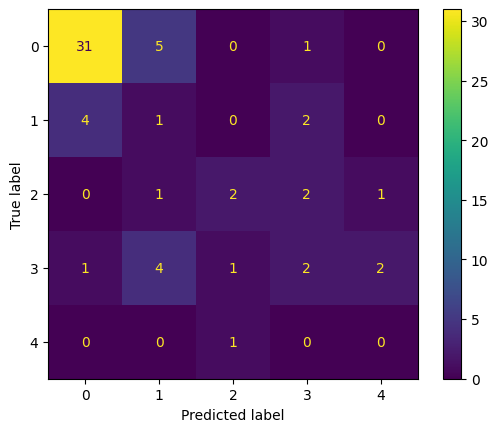

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
train_dataloader, val_dataloader, test_dataloader, test_size = create_loaders(datasets, batch_size=test_size)
model.eval()
correct, total = 0, 0
for batch in test_dataloader:
  x, y_batch = [t.to(device) for t in batch]
  out = model(x)

  preds = F.log_softmax(out, dim=1).argmax(dim=1)

  total += y_batch.size(0)
  correct += (preds == y_batch).sum().item()
  cm = confusion_matrix(preds, y_batch)
  ConfusionMatrixDisplay(cm).plot()